In [6]:
# from spacy import load, prefer_gpu 
from helpers import get_dates_from_file
from glob import glob
from tqdm import tqdm
from datetime import datetime
import pandas as pd 
from spacy import load, prefer_gpu
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner-with-dates")
model = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/camembert-ner-with-dates")
# Parameters
useSpacy = True
folder = "./results/NYT/1920"
nlp =  ""

# Initialise pipeline according to the correct library
if useSpacy:
    prefer_gpu()
    nlp = load("en_core_web_sm")
else : 
    nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple", device = 0)



In [25]:
# Compute the results from the previously created files (using fileCreater.ipynb)

results = []
nb = []
for file in tqdm(glob(folder + "/*/*.csv")):        # Compute the nb of dates
    results.append(get_dates_from_file(file,nlp,useSpacy,rt = 0.75, lt = 15))
for file in tqdm(glob(folder + "/*/*.csv")): # Get the length of the text from each date
    nb.append(pd.read_csv(file)["Length"].sum())
df = pd.DataFrame(results, columns = ["Date", "Number of dates"])




100%|██████████| 92/92 [00:01<00:00, 72.62it/s]


<AxesSubplot:xlabel='Date', ylabel='ratio'>

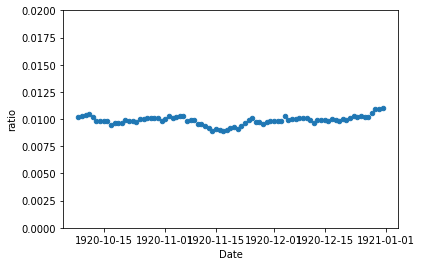

In [29]:
# Plotting the results
df["length"] = nb
df["ratio"] = (df["Number of dates"]/df["length"]).rolling(window = 8).mean() # You can configure the rolling average window size, default 8
df.plot(x= "Date", y = "ratio", kind = "scatter", ylim = (0,0.02))